In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def show(img, title=None, cmap=None):
    plt.figure(figsize=(6,4))
    if img.ndim == 2:
        plt.imshow(img, cmap=cmap or "gray")
    else:
        plt.imshow(img)
    if title:
        plt.title(title)
    plt.axis("off")
    plt.show()

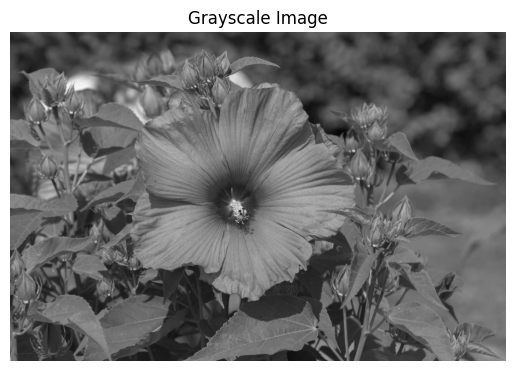

In [2]:
image_data = cv2.imread("./flower.jpg", 0)

plt.imshow(image_data, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

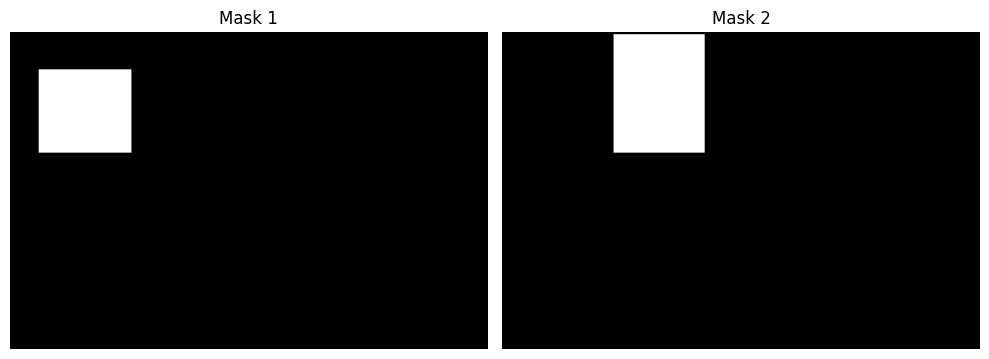

In [3]:
mask1 = np.zeros(image_data.shape[:2], np.uint8)
mask2 = np.zeros(image_data.shape[:2], np.uint8)

cv2.rectangle(mask1, (90, 120), (380, 380), 255, -1)
cv2.rectangle(mask2, (350, 10), (635, 380), 255, -1)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(mask1, cmap='gray')
plt.title("Mask 1")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(mask2, cmap='gray')
plt.title("Mask 2")
plt.axis("off")

plt.tight_layout()
plt.show()


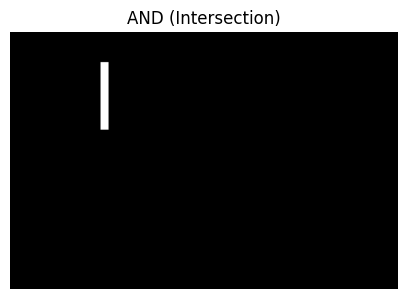

In [4]:
And = cv2.bitwise_and(mask1, mask2)

plt.figure(figsize=(5,5))
plt.imshow(And, cmap='gray')
plt.title("AND (Intersection)")
plt.axis("off")
plt.show()

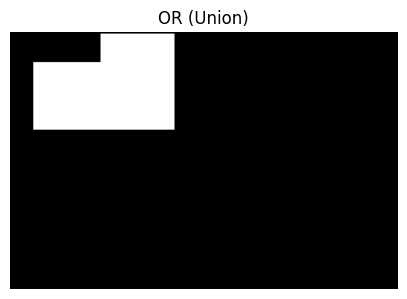

In [5]:
bitwiseOr = cv2.bitwise_or(mask1, mask2)

plt.figure(figsize=(5,5))
plt.imshow(bitwiseOr, cmap='gray')
plt.title("OR (Union)")
plt.axis("off")
plt.show()

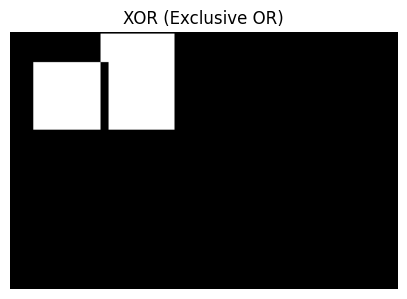

In [6]:
bitwiseXor = cv2.bitwise_xor(mask1, mask2)

plt.figure(figsize=(5,5))
plt.imshow(bitwiseXor, cmap='gray')
plt.title("XOR (Exclusive OR)")
plt.axis("off")
plt.show()

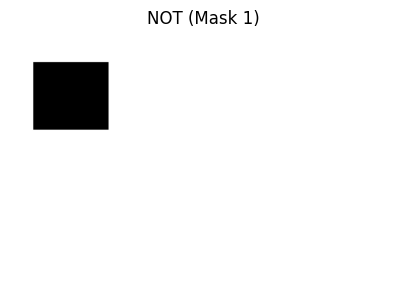

In [7]:
bitwiseNot_sq = cv2.bitwise_not(mask1)

plt.figure(figsize=(5,5))
plt.imshow(bitwiseNot_sq, cmap='gray')
plt.title("NOT (Mask 1)")
plt.axis("off")
plt.show()

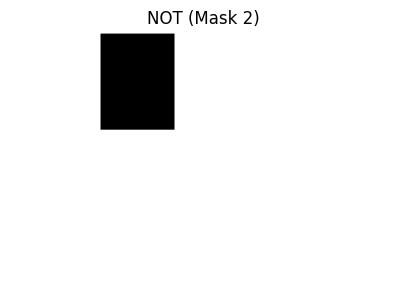

In [8]:
bitwiseNot_ell = cv2.bitwise_not(mask2)

plt.figure(figsize=(5,5))
plt.imshow(bitwiseNot_ell, cmap='gray')
plt.title("NOT (Mask 2)")
plt.axis("off")
plt.show()

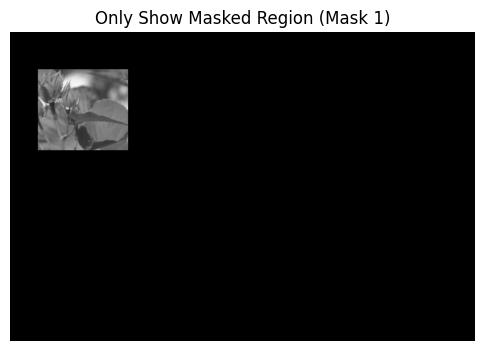

In [15]:
flower = cv2.bitwise_and(image_data, image_data, mask=mask1)

flower_rgb = cv2.cvtColor(flower, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.imshow(flower_rgb)
plt.title("Only Show Masked Region (Mask 1)")
plt.axis("off")
plt.show()

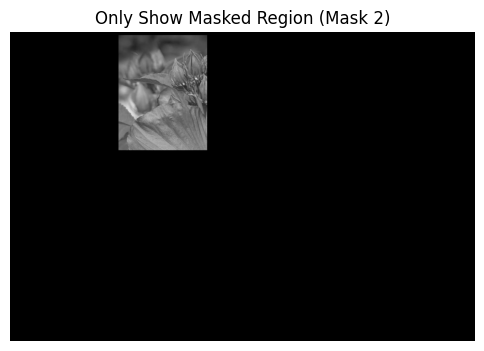

In [16]:
flower2 = cv2.bitwise_and(image_data, image_data, mask=mask2)

flower2_rgb = cv2.cvtColor(flower2, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.imshow(flower2_rgb)
plt.title("Only Show Masked Region (Mask 2)")
plt.axis("off")
plt.show()

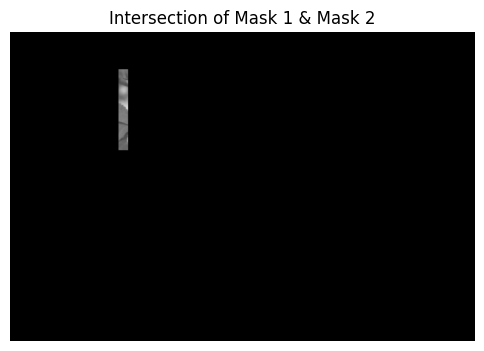

In [17]:
flower3 = cv2.bitwise_and(image_data, image_data, mask=And)

flower3_rgb = cv2.cvtColor(flower3, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.imshow(flower3_rgb)
plt.title("Intersection of Mask 1 & Mask 2")
plt.axis("off")
plt.show()

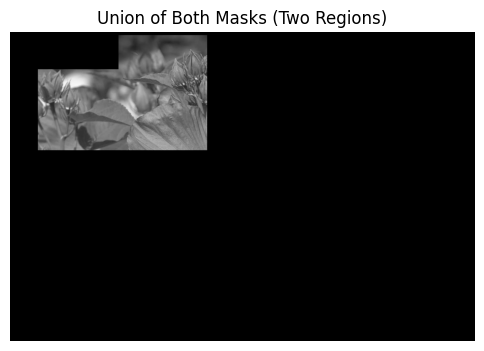

In [18]:
dog = cv2.bitwise_and(image_data, image_data, mask=bitwiseOr)

dog_rgb = cv2.cvtColor(dog, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.imshow(dog_rgb)
plt.title("Union of Both Masks (Two Regions)")
plt.axis("off")
plt.show()

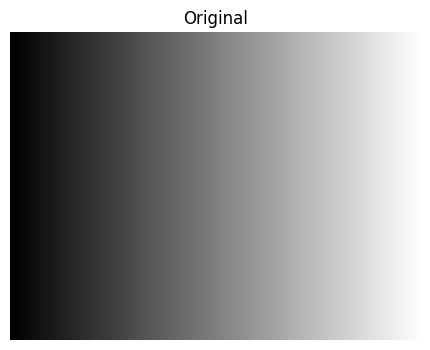

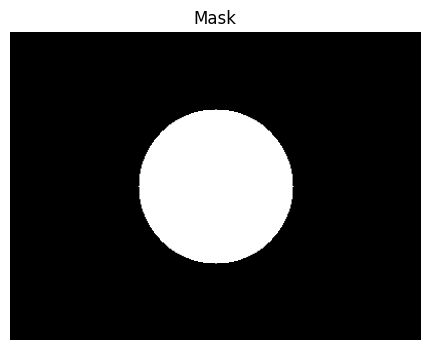

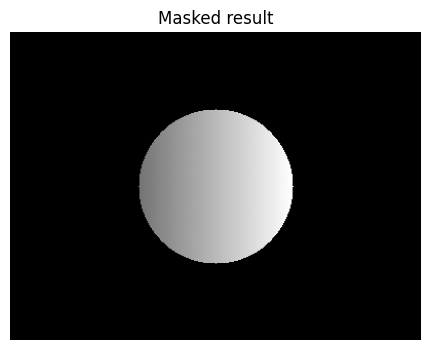

In [26]:
img = np.tile(np.linspace(0,255,400, dtype=np.uint8), (300,1))

h, w = img.shape
mask = np.zeros((h,w), dtype=np.uint8)

# TODO: define center and radius, then draw the circle on mask
cx, cy = w//2, h//2
r = min(h,w)//4
cv2.circle(mask, (cx, cy), r, 255, -1)

# TODO: apply mask
masked = cv2.bitwise_and(img, img, mask=mask)

show(img, "Original", cmap="gray")
show(mask, "Mask", cmap="gray")
show(masked, "Masked result", cmap="gray")

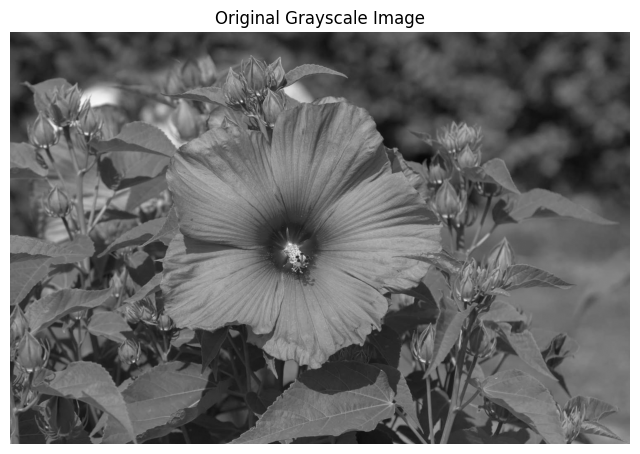

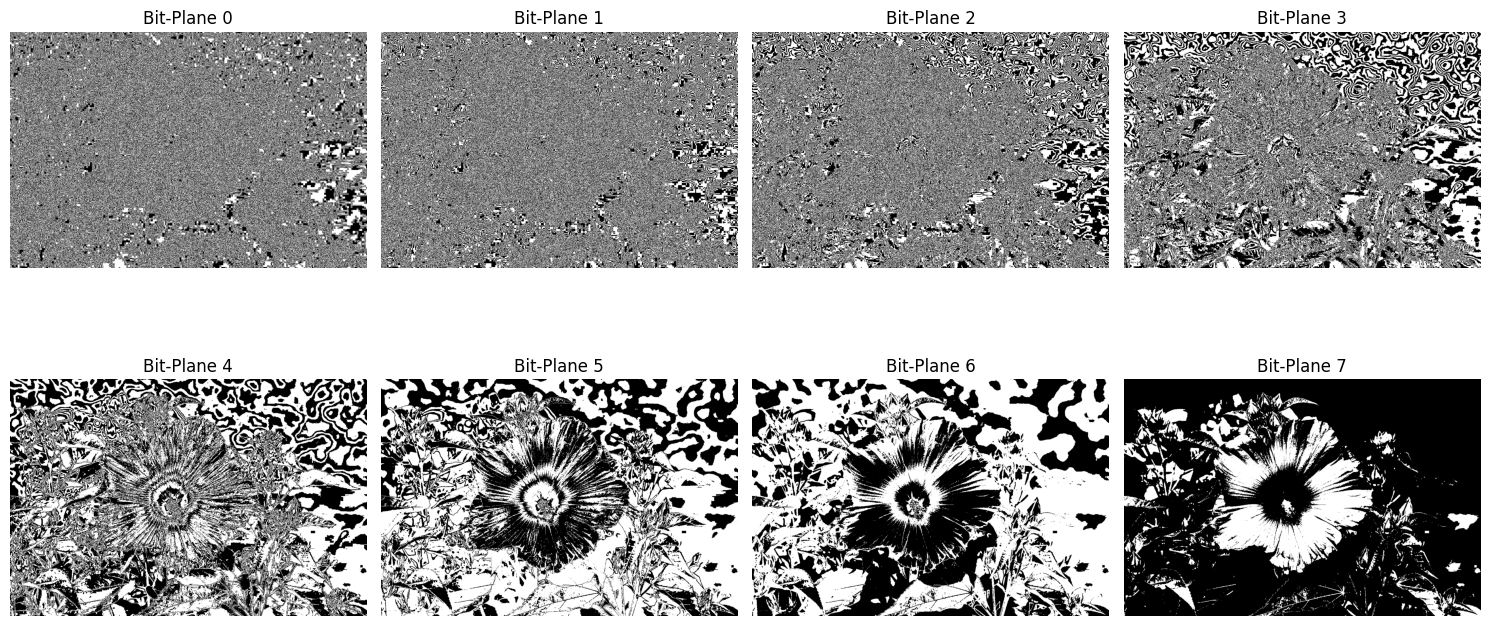

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_bit_planes(image_gray):
    if image_gray is None:
        print("Error: Image not loaded.")
        return

    plt.figure(figsize=(8, 6))
    plt.imshow(image_gray, cmap='gray')
    plt.title('Original Grayscale Image')
    plt.axis('off')
    plt.show()

    fig, axes = plt.subplots(2, 4, figsize=(15, 8))
    axes = axes.flatten()

    for i in range(8):
        bit_plane = ((image_gray >> i) & 1) * 255

        axes[i].imshow(bit_plane, cmap='gray')
        axes[i].set_title(f'Bit-Plane {i}')
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

display_bit_planes(image_data)

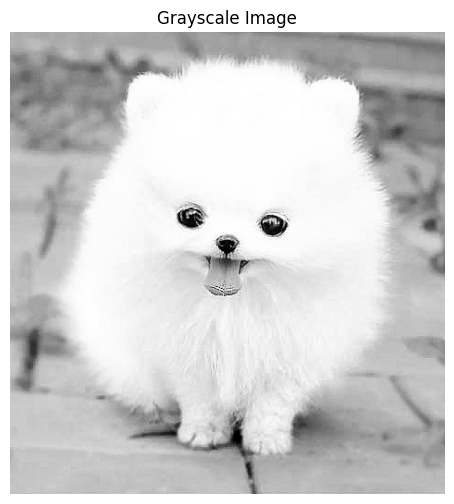

In [28]:
img = cv2.imread('./puppy.jpg', 0)

plt.figure(figsize=(6,6))
plt.imshow(img, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

Text(0, 0.5, 'Frequency')

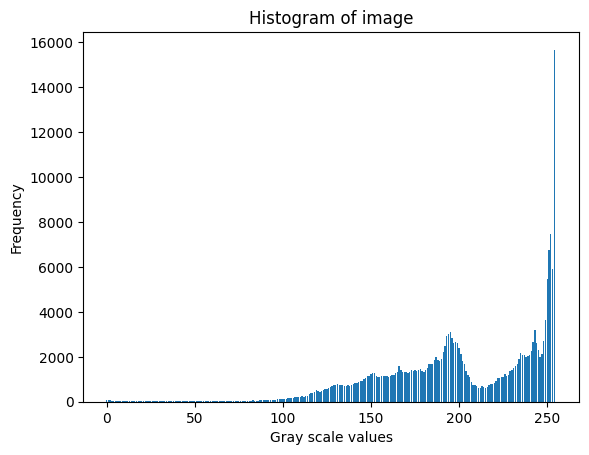

In [29]:
hist = cv2.calcHist(images=[img], channels=[0], mask=None, histSize=[256], ranges=[0, 255])

plt.bar(range(256), hist.ravel())
plt.title('Histogram of image')
plt.xlabel('Gray scale values')
plt.ylabel('Frequency')

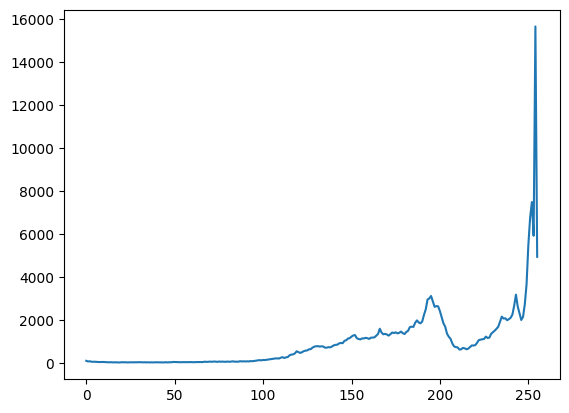

In [30]:
hist,bins = np.histogram(img.ravel(),256,[0,256])
plt.plot(hist)

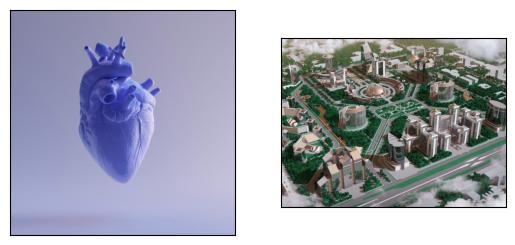

In [32]:
img1 = cv2.imread('./heart.jpg')
img2 = cv2.imread('./tashkent.webp')

plt.subplot(121), plt.imshow(img1)
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(img2)
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.show()

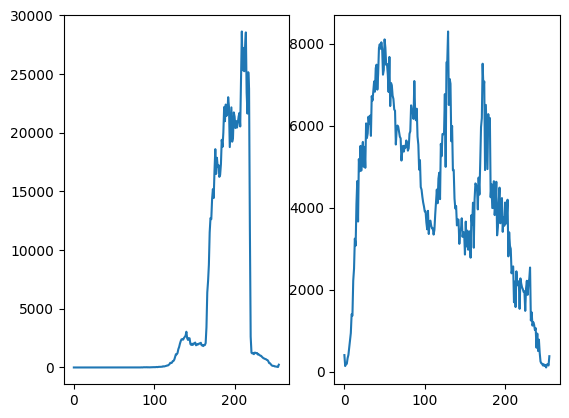

In [34]:
hist_high = cv2.calcHist([img1],[2],None,[256],[0,256])
hist_low = cv2.calcHist([img2],[2],None,[256],[0,256])

# Plot histograms
plt.subplot(121)
plt.plot(hist_high)

plt.subplot(122)
plt.plot(hist_low)

plt.show()

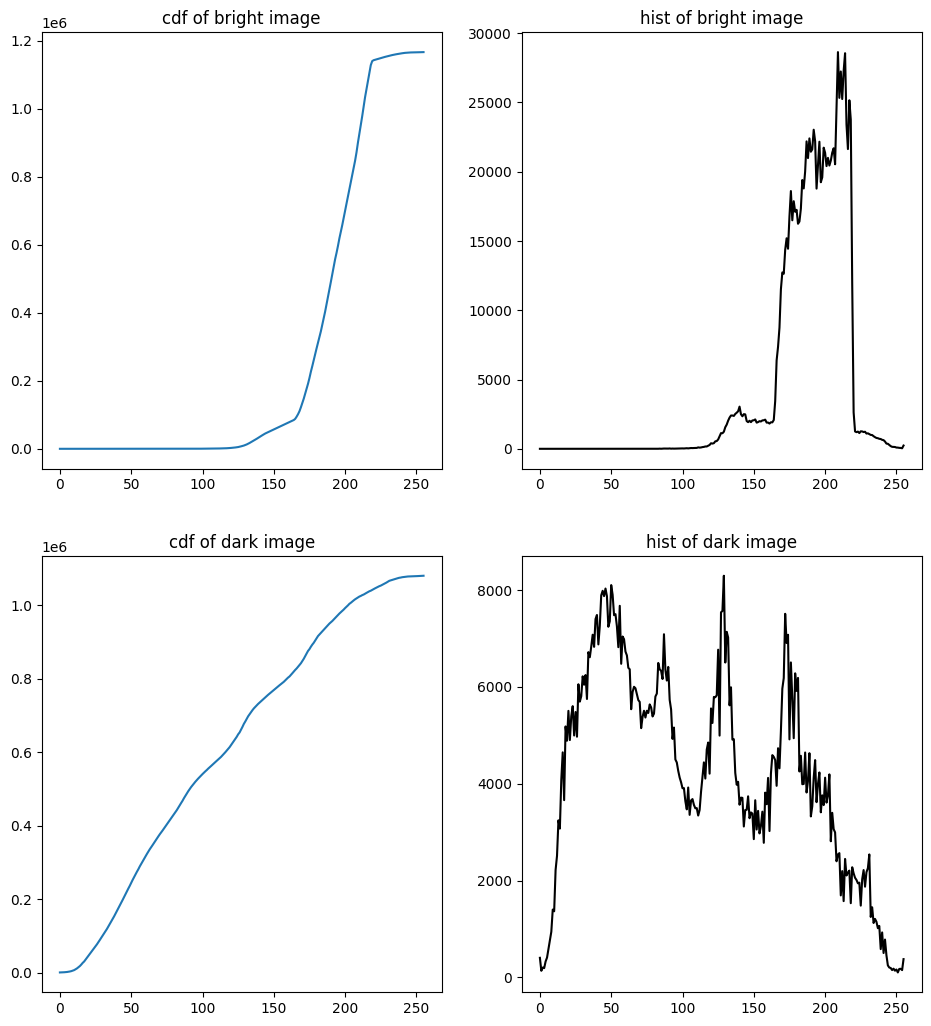

In [35]:

cdf_low = hist_low.cumsum()
cdf_high = hist_high.cumsum()

plt.subplot(221), plt.plot(cdf_high), plt. title('cdf of bright image')
plt.subplot(222), plt.plot(hist_high, 'k'), plt. title('hist of bright image')

plt.subplot(223), plt.plot(cdf_low), plt. title('cdf of dark image')
plt.subplot(224), plt.plot(hist_low, 'k'), plt. title('hist of dark image')

plt.subplots_adjust(bottom=1, right=1.5, top=3)

plt.show()


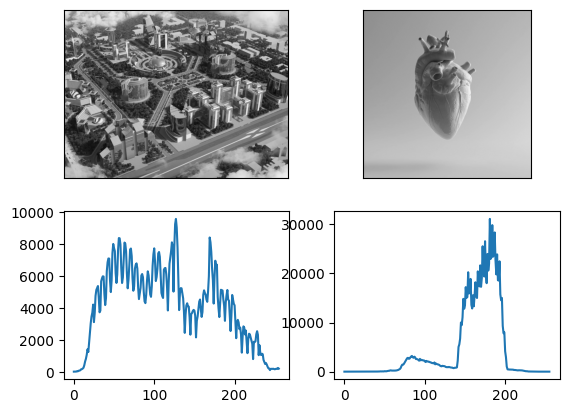

In [36]:
low_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
high_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

plt.subplot(221), plt.imshow(high_gray, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.plot(cv2.calcHist([high_gray],[0],None,[256],[0,256]))

plt.subplot(222), plt.imshow(low_gray, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.plot(cv2.calcHist([low_gray],[0],None,[256],[0,256]))

plt.show()

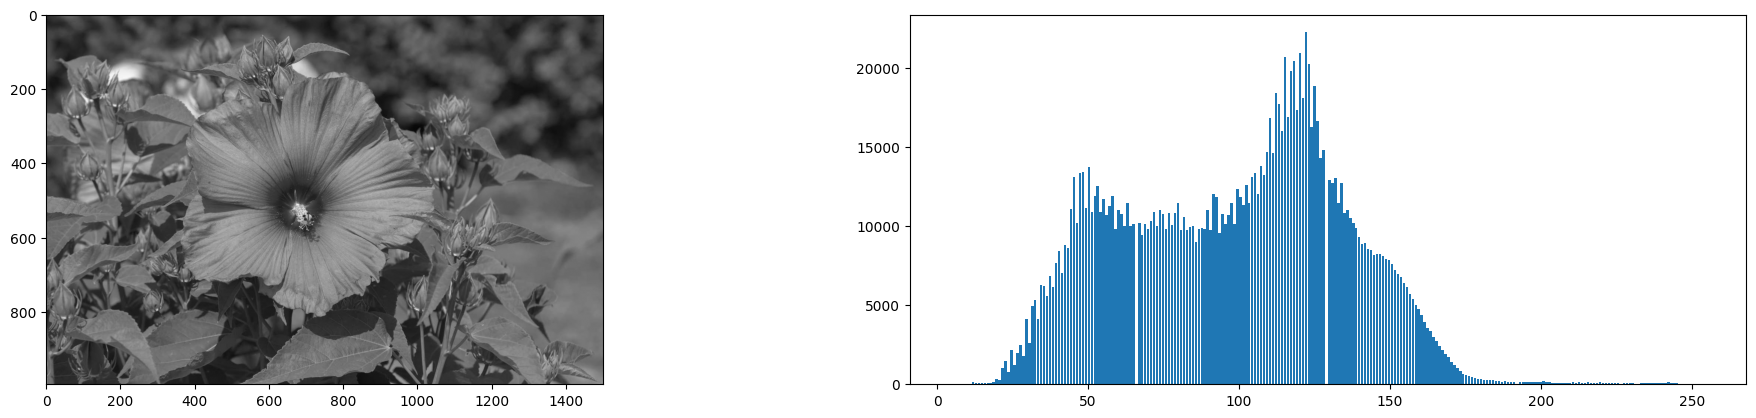

In [38]:

img = cv2.imread("./flower.jpg", 0)
img_hist = np.histogram(img, bins=256)

plt.subplot(121), plt.imshow(img, cmap='gray')
plt.subplot(122), plt.bar(img_hist[1][1:], img_hist[0])
plt.subplots_adjust(right=3)
plt.show()


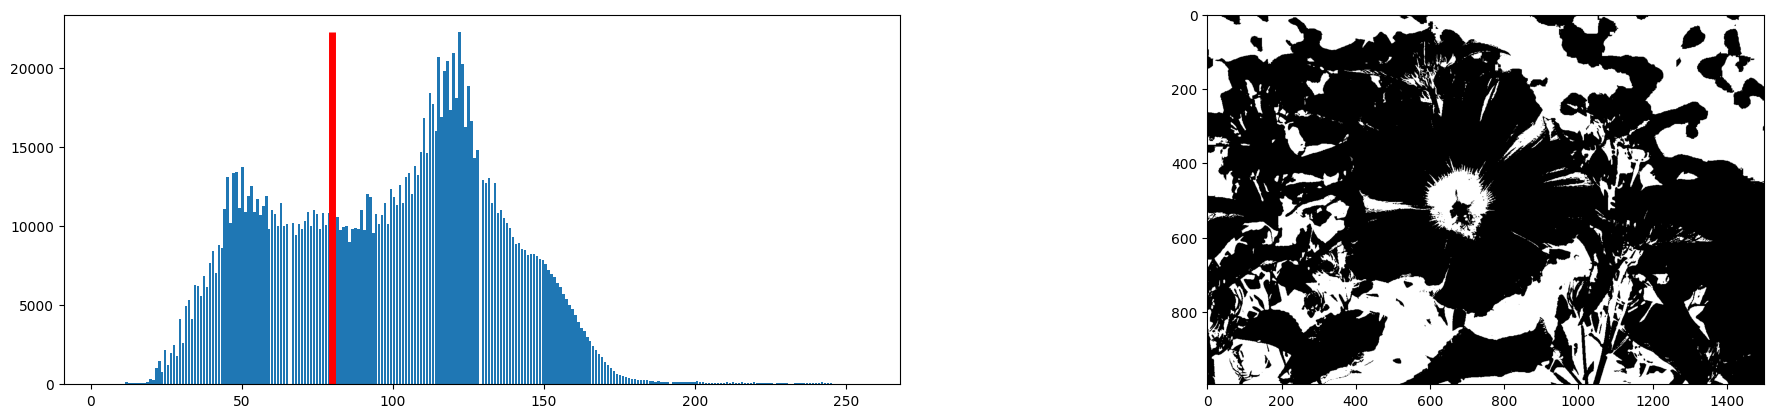

[ True  True  True ...  True  True  True]


In [39]:
t = 80
thresholded = img < t

plt.subplot(121)
plt.bar(img_hist[1][1:], img_hist[0])
plt.vlines(t, 0, np.amax(img_hist[0]), colors='r', linewidth=5)
plt.subplot(122)
plt.imshow(thresholded, cmap="gray")
plt.subplots_adjust(right=3)
plt.show()

print(thresholded[150])

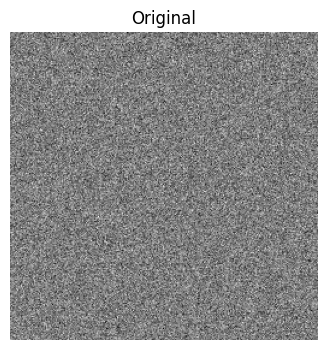

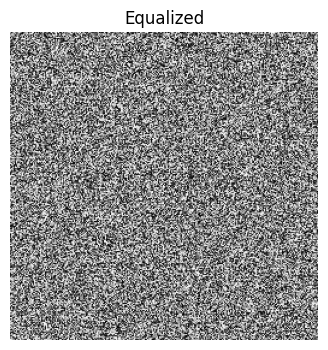

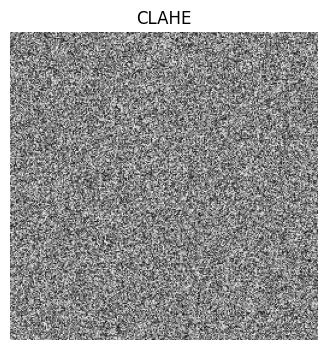

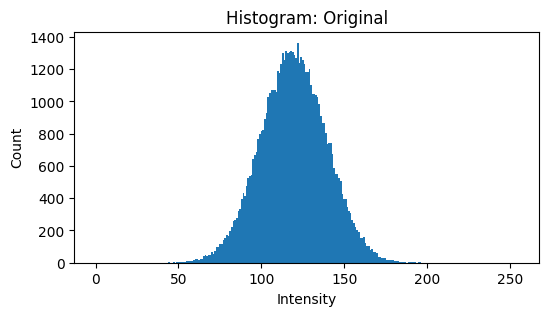

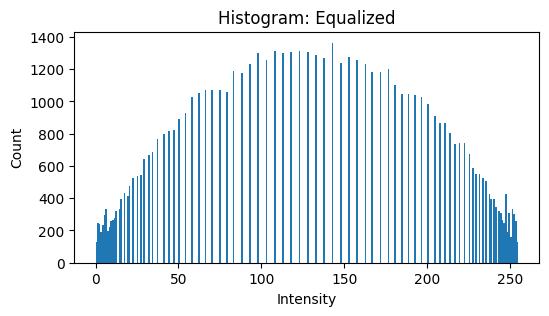

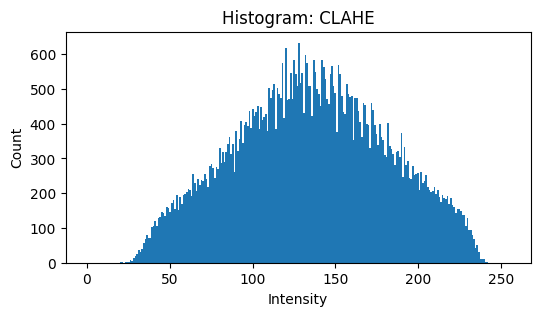

In [40]:
img = np.uint8(np.clip(120 + 20*np.random.randn(256,256), 0, 255))

eq = cv2.equalizeHist(img)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)).apply(img)

def plot_hist(a, title):
    plt.figure(figsize=(6,3))
    plt.hist(a.ravel(), bins=256, range=(0,255))
    plt.title(title)
    plt.xlabel("Intensity")
    plt.ylabel("Count")
    plt.show()

show(img, "Original", cmap="gray")
show(eq, "Equalized", cmap="gray")
show(clahe, "CLAHE", cmap="gray")

plot_hist(img, "Histogram: Original")
plot_hist(eq, "Histogram: Equalized")
plot_hist(clahe, "Histogram: CLAHE")